#Assignment for Lab 4 for KNN

#Importing the libraries

In [45]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.datasets import make_classification

#Importing the dataset

In [3]:
dataset = pd.read_csv('diabetes.csv')

We will take a look at the dataset.



In [4]:
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148,72.0,35.0,0,33.6,0.627,50.0,1
1,1.0,85,66.0,29.0,0,26.6,0.351,31.0,0
2,8.0,183,64.0,0.0,0,23.3,0.672,32.0,1
3,1.0,89,66.0,23.0,94,28.1,0.167,21.0,0
4,0.0,137,40.0,35.0,168,43.1,2.288,33.0,1
...,...,...,...,...,...,...,...,...,...
763,10.0,101,76.0,48.0,180,32.9,0.171,63.0,0
764,2.0,122,70.0,27.0,0,36.8,0.340,27.0,0
765,5.0,121,72.0,23.0,112,26.2,0.245,30.0,0
766,1.0,126,60.0,0.0,0,30.1,0.349,47.0,1


As we can see our dataset is a big dataset with 768 rows and 9 columns. Let us find out more about the dataset.

In [5]:
dataset.dtypes

Pregnancies                 float64
Glucose                       int64
BloodPressure               float64
SkinThickness               float64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                         float64
Outcome                       int64
dtype: object

In [6]:
dataset.shape

(768, 9)

In [7]:
dataset.info

<bound method DataFrame.info of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6.0      148           72.0           35.0        0  33.6   
1            1.0       85           66.0           29.0        0  26.6   
2            8.0      183           64.0            0.0        0  23.3   
3            1.0       89           66.0           23.0       94  28.1   
4            0.0      137           40.0           35.0      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763         10.0      101           76.0           48.0      180  32.9   
764          2.0      122           70.0           27.0        0  36.8   
765          5.0      121           72.0           23.0      112  26.2   
766          1.0      126           60.0            0.0        0  30.1   
767          1.0       93           70.0           31.0        0  30.4   

     DiabetesPedigreeFunction   Age  Outcome  
0                       0.627  5

#Taking care of missing data

In [8]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,766.000000,768.000000,766.000000,765.000000,768.000000,766.000000,766.000000,766.000000,768.000000
mean,3.852480,120.894531,69.083551,20.500654,79.799479,31.991514,0.471723,33.241514,0.348958
std,3.370834,31.972618,19.375905,15.966639,115.244002,7.867256,0.331301,11.764482,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.575000,0.625500,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Here, in the count option we can see that all the numerical columns do not have all 768 values, thus this means that there exist missing values in the dataset. Thus, we will now handle the missing data.


Thus, we will handle the missing data by entering the value of the mean in the place of all the missing values.

In [9]:
dataset.isnull().sum()

Pregnancies                 2
Glucose                     0
BloodPressure               2
SkinThickness               3
Insulin                     0
BMI                         2
DiabetesPedigreeFunction    2
Age                         2
Outcome                     0
dtype: int64

Replacing the Null values with the mean of their columns:

In [10]:
dataset['Pregnancies'] = dataset['Pregnancies'].fillna(dataset['Pregnancies'].mean())
dataset['BloodPressure'] = dataset['BloodPressure'].fillna(dataset['BloodPressure'].mean())
dataset['SkinThickness'] = dataset['SkinThickness'].fillna(dataset['SkinThickness'].mean())
dataset['BMI'] = dataset['BMI'].fillna(dataset['BMI'].mean())
dataset['DiabetesPedigreeFunction'] = dataset['DiabetesPedigreeFunction'].fillna(dataset['DiabetesPedigreeFunction'].mean())
dataset['Age'] = dataset['Age'].fillna(dataset['Age'].mean())
dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

As we can see all the null values have been replaced by their means and there are no more null values in the dataset.


Now in this dataset there are some values which cannot be equal to zero. These attributes having the value of zero will affect the database. Thus, we also need to deal with these attributes. We will be replacing these attributes with their means as follows:

In [11]:
zero_not_accepted = ['Glucose', 'BloodPressure', 'SkinThickness', 'BMI', 'Insulin']
for column in zero_not_accepted:
  dataset[column] = dataset[column].replace(0, np.NaN)
  mean = int(dataset[column].mean(skipna = True))
  dataset[column] = dataset[column].replace(np.NaN, mean)

According to our code, the zeros are all replaced with the means now, we will now be looking at the dataset to confirm this

In [12]:
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,155.0,33.6,0.627,50.0,1
1,1.0,85.0,66.0,29.0,155.0,26.6,0.351,31.0,0
2,8.0,183.0,64.0,29.0,155.0,23.3,0.672,32.0,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63.0,0
764,2.0,122.0,70.0,27.0,155.0,36.8,0.340,27.0,0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0,0
766,1.0,126.0,60.0,29.0,155.0,30.1,0.349,47.0,1


The reader can confirm that the values which were earlier zero in this dataset are now replaced with the mean of that particular column.

#Splitting the dataset into the Training set and Test set

We will be splitting the dataset first into X and Y. X means the set of the dataset that is independent and Y is the set of dataset that is dependent.

In [13]:
X = dataset.iloc[:, 0:8]
y = dataset.iloc[:, 8]

We will now display the X and Y sets.

In [14]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.0,148.0,72.0,35.0,155.0,33.6,0.627,50.0
1,1.0,85.0,66.0,29.0,155.0,26.6,0.351,31.0
2,8.0,183.0,64.0,29.0,155.0,23.3,0.672,32.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0
...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63.0
764,2.0,122.0,70.0,27.0,155.0,36.8,0.340,27.0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0
766,1.0,126.0,60.0,29.0,155.0,30.1,0.349,47.0


In [15]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

As we can see the independent and dependent (outcome) data has been seperated.

The next step is the split the dataset into training data and testing data, let us do so:

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

Splitting the dataset into 80% and 20% where 80% is the training set and 20% is the testing set.

Let us see if the dataset has split properly:

In [17]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
603,7.0,150.0,78.0,29.0,126.0,35.2,0.692,54.0
118,4.0,97.0,60.0,23.0,155.0,28.2,0.443,22.0
247,0.0,165.0,90.0,33.0,680.0,52.3,0.427,23.0
157,1.0,109.0,56.0,21.0,135.0,25.2,0.833,23.0
468,8.0,120.0,72.0,29.0,155.0,30.0,0.183,38.0
...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63.0
192,7.0,159.0,66.0,29.0,155.0,30.4,0.383,36.0
629,4.0,94.0,65.0,22.0,155.0,24.7,0.148,21.0
559,11.0,85.0,74.0,29.0,155.0,30.1,0.300,35.0


In [18]:
X_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
661,1.0,199.0,76.0,43.0,155.0,42.9,1.394,22.0
122,2.0,107.0,74.0,30.0,100.0,33.6,0.404,23.0
113,4.0,76.0,62.0,29.0,155.0,34.0,0.391,25.0
14,5.0,166.0,72.0,19.0,175.0,25.8,0.587,51.0
529,0.0,111.0,65.0,29.0,155.0,24.6,0.660,31.0
...,...,...,...,...,...,...,...,...
476,2.0,105.0,80.0,45.0,191.0,33.7,0.711,29.0
482,4.0,85.0,58.0,22.0,49.0,27.8,0.306,28.0
230,4.0,142.0,86.0,29.0,155.0,44.0,0.645,22.0
527,3.0,116.0,74.0,15.0,105.0,26.3,0.107,24.0


In [19]:
y_train

603    1
118    0
247    0
157    0
468    1
      ..
763    0
192    1
629    0
559    0
684    0
Name: Outcome, Length: 614, dtype: int64

In [20]:
y_test

661    1
122    0
113    0
14     1
529    0
      ..
476    1
482    0
230    1
527    0
380    0
Name: Outcome, Length: 154, dtype: int64

As we can see the training set has 614 rows and the testing set has 154 rows. This divides our dataset into 2 sets of 80% and 20%.

#Feature Scaling

For any algorithm that calculates the distance it assumes normality, we should always scale the features and since the KNN algorithm calculates distance to detect the nearest neighbours we will scale the features here to. Here, we will be using Standard Scaling.



Standard Scaling helps us to remove the mean of a feature and scale the feature to unit variance. This brings around a normalcy of the data and instead of being in a wide range of say, 3 to 500, the data remains in a manageable range.

In [21]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

Apparantly we have feature scaled all the various features of the training and testing set of the independent data. Let us see if it is correct below:

In [22]:
print(X_train)

[[ 0.90666313  0.93641795  0.44922965 ...  0.37085391  0.67915078
   1.70142031]
 [ 0.03378495 -0.81630913 -1.0507738  ... -0.63623082 -0.07004276
  -0.9668529 ]
 [-1.13005262  1.43247278  1.44923195 ...  2.83101803 -0.11818371
  -0.88346936]
 ...
 [ 0.03378495 -0.91552009 -0.63410618 ... -1.13977319 -0.95764154
  -1.05023644]
 [ 2.0705007  -1.21315299  0.11589555 ... -0.36287925 -0.50030251
   0.11713309]
 [ 0.32474435  0.47343344  0.78256375 ... -0.08952768  0.52269269
   2.95217337]]


In [23]:
print(X_test)

[[-0.83909322  2.55686374  0.2825626  ...  1.47864711  2.79133498
  -0.9668529 ]
 [-0.54813383 -0.4856059   0.11589555 ...  0.14066311 -0.18738633
  -0.88346936]
 [ 0.03378495 -1.51078589 -0.88410675 ...  0.19821081 -0.22650085
  -0.71670229]
 ...
 [ 0.03378495  0.67185537  1.11589785 ...  1.63690328  0.53773674
  -0.9668529 ]
 [-0.25717444 -0.187973    0.11589555 ... -0.90958239 -1.08100272
  -0.80008583]
 [-0.83909322 -0.4856059  -0.0507715  ... -0.26217078  1.06728719
  -0.80008583]]


As we can see the values of the different features have changed and they seem to be within a manageable range now. We will now move onto the next step of defining the model using KNeighborsClassifier and fitting the train data in the model.

#Training the K-NN model on the Training set

We will now be using the KNeighboursClassifier and will be fitting the training data in this model.

In [24]:
import math
math.sqrt(len(X_test))

12.409673645990857

Here, we have the square root of the number of data entries and this means we can use this as the value of k. However, we do not use the an even value as the value of k and thus, we will deduct 1 from the answer and take k = 11.

In [25]:
classifier = KNeighborsClassifier(n_neighbors = 11, metric = 'euclidean', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=11)

We have now fitted the training dataset in the classifier, we will move on to predicting the data values of our test cases now.

#Predicting the Test set results

In [26]:
y_pred = classifier.predict(X_test)

We have now created an array that has the predicted values according to our KNN classifier. The next step prints it along side of the actual test data set so that we can see how much of our predicted data is correct.

In [27]:
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.values.reshape(len(y_test),1)),1))

[[1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 1]
 [1 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 1]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]

By seeing this array, we can tell that there are some discrepancies between the actual output and the predicted output. We will figure out the accuracy of the classifier in the following segments.

#Making the Confusion Matrix

We will first start by creating the Confusion Matrix. This will tell us the number of True Positives, False Positives, True Negatives and False Negatives.

In [28]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[93 14]
 [15 32]]


Here, predicted values are on top and the actual values are in the column, i.e., 93 is the true positive (people who do not have diabetes, correctly predicted), 14 is the false negatives (people who do not have diabetes, but predicted that they do have diabetes), 15 indicates false positives (the number of people who have diabetes but it is predicted that they do not have diabetes) and finally we have 32 which are the true negatives (which means that the people who have diabetes and it is predicted that they do have diabetes)

We will now move onto the F1 score and the accuracy score.

In [29]:
print(f1_score(y_test, y_pred))

0.6881720430107526


F1 score is the harmonic mean of Recall and Precision. it takes into consideration all the values.

In [30]:
print(accuracy_score(y_test, y_pred))

0.8116883116883117


This takes into account only the times when the prediction was right (both positive and negative)

We will now look at the other statistics that tell us how fair our model is:

In [31]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.87      0.87       107
           1       0.70      0.68      0.69        47

    accuracy                           0.81       154
   macro avg       0.78      0.78      0.78       154
weighted avg       0.81      0.81      0.81       154



Here, we also get the Precision and Recall. Precision tells us that when the model is positive, how often it is correct. Whereas, recall tells us how often the model actually predicts the cirrect positive values.



We will now be moving onto the plot confusion matrix:

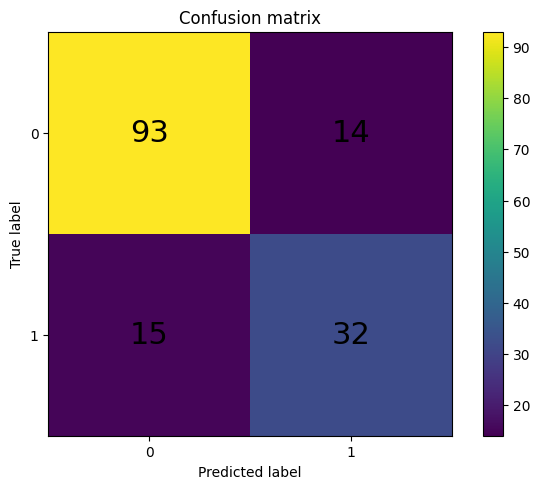

In [32]:
def plot_confusion_matrix(cm, target_names, title='Confusion matrix', cmap=plt.cm.summer):
    plt.clf
    plt.imshow(cm, interpolation='nearest')
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(target_names))
    plt.xticks(tick_marks, target_names)
    plt.yticks(tick_marks, target_names)
    plt.tight_layout()

    width, height = cm.shape

    for x in range(width):
        for y in range(height):
            plt.annotate(str(cm[x][y]), xy=(y, x),
                        horizontalalignment='center',
                        verticalalignment='center',color='black',fontsize=22)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
plot_confusion_matrix(cm, np.unique(y_pred))

Here, as we can see the plot confusion matrix has been created to give us a clearer understanding of the true positives, true negatives, false positives and false negatives.

We will now be looking at various different k values and see how the accuracy score differs accordingly.

#Calculating the accuracy score for different 'k' values

[0.7662337662337663, 0.7922077922077922, 0.7987012987012987, 0.8116883116883117, 0.8181818181818182, 0.8181818181818182, 0.7922077922077922, 0.7857142857142857, 0.7857142857142857]


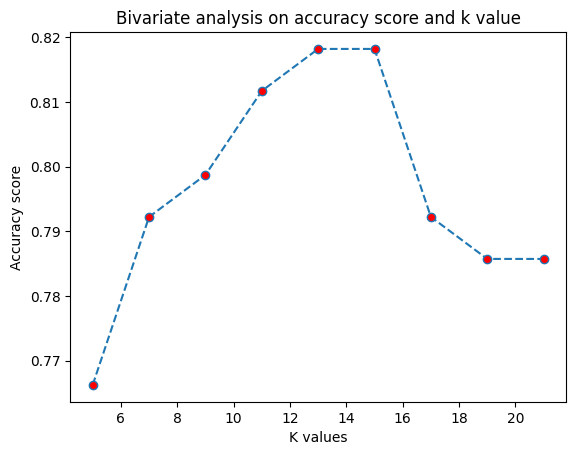

In [33]:
pred_accuracy_list = []
k_list = [5, 7, 9, 11, 13, 15, 17, 19, 21]
for k in k_list:
    classifier = KNeighborsClassifier(n_neighbors = k)
    classifier.fit(X_train, y_train)
    pred = classifier.predict(X_test)
    score = accuracy_score(y_test,pred)
    pred_accuracy_list.append(accuracy_score(y_test,pred))
print(pred_accuracy_list)
plt.plot(k_list,pred_accuracy_list,marker="o",markerfacecolor="red",linestyle = "dashed")
plt.title("Bivariate analysis on accuracy score and k value")
plt.xlabel("K values")
plt.ylabel("Accuracy score")
plt.show()

As we can see that the accuracy score of the model is maximum when the values of k are either 13 or 15. Thus, we can say that the most optimal values of k = 13 or 15. We will now perform a comparative analysis of obtained accuracy with various distances and k values using a suitable plot

#Perform a comparative analysis of obtained accuracy with various distances and k values using a suitable plot

To gain insight into the impact of different distance metrics and k values on the model's accuracy, we perform a comparative analysis. By iterating over different distance metrics (e.g., Euclidean distance, Manhattan distance) and k values, we train multiple K-NN models and record their accuracy scores. The results are plotted using a suitable visualization tool, such as matplotlib, to facilitate comparison and identification of patterns.

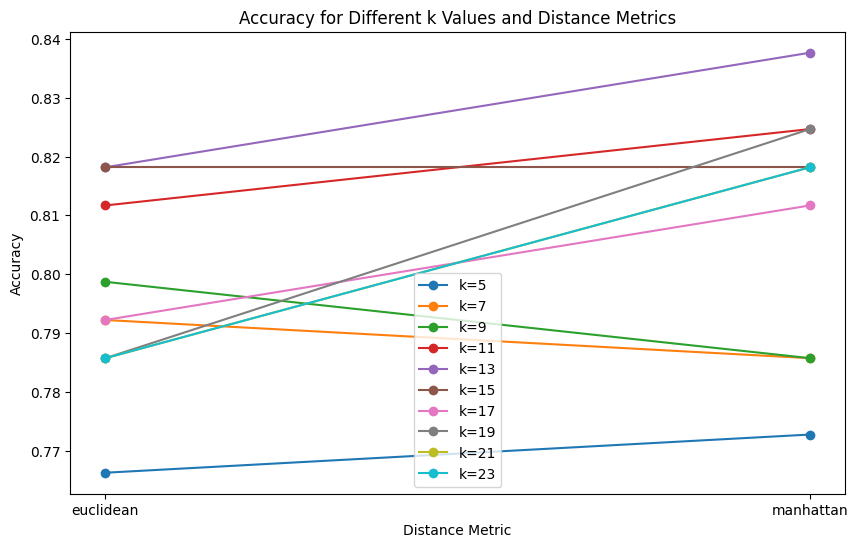

In [35]:
k_values = [5,7,9,11,13,15,17,19,21,23]
distances = ['euclidean', 'manhattan']

accuracy_scores = []

for k in k_values:
    for distance in distances:
        classifier = KNeighborsClassifier(n_neighbors=k, metric=distance)
        classifier.fit(X_train, y_train)
        y_pred = classifier.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        accuracy_scores.append((k, distance, accuracy))

df_accuracy = pd.DataFrame(accuracy_scores, columns=['k', 'Distance Metric', 'Accuracy'])
plt.figure(figsize=(10, 6))
for k in k_values:
    subset = df_accuracy[df_accuracy['k'] == k]
    plt.plot(subset['Distance Metric'], subset['Accuracy'], marker='o', label=f'k={k}')

plt.xlabel('Distance Metric')
plt.ylabel('Accuracy')
plt.title('Accuracy for Different k Values and Distance Metrics')
plt.legend()
plt.show()

In the above diagram we can see that we get the maximum accuracy with the Manhattan Metric when k = 13. However, since we used the Euclidean Metric we will concentrate on the accuracy scores of the values of k using the Eucliean Metric. In the Euclidean Metric, the k values of 13 and 15 are the most optimal.

We will now move onto the visualisation of the training and testing set results.

#Visualising the Training/Testing set results

To visually understand the performance of the K-NN model, we can project the data onto a 2D or 3D space for visualization. In this example, we use a scatter plot to visualize two features from the dataset. We plot the training set data points with their corresponding class labels, and overlay the test set predictions as markers. This visualization allows us to observe the separation of different classes and evaluate how well the model performs on unseen data.


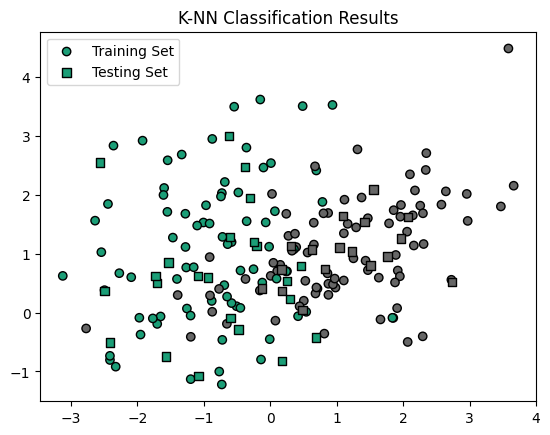

In [46]:
X, y = make_classification(n_samples=200, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='Dark2', edgecolors='k', label='Training Set')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='Dark2', edgecolors='k', marker='s', label='Testing Set')
plt.legend()
plt.title('K-NN Classification Results')
plt.show()